# Evaluation of the Ratio & Normalized Cut Values

In [1]:
from experiment_utils import *
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import preprocessing

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
df, labels = compute_descriptors_from_file("all_point_clouds.npz")

## Across K Performance

In [5]:
descriptors = [['evrap', 'samp', 'sirm', 'scomp'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
               ['evrap'], ['samp'], ['sirm'], ['scomp']]
k_values = range(2, 26)
knn_types = ['mutual', 'symmetric']

In [6]:
plot_data = {
    knn_type: {
        metric: { '_'.join(descriptor): [] for descriptor in descriptors }
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}
for k in k_values:
    for knn_type in knn_types:
        for descriptor in descriptors:
            knn_graph = compute_knn(df, descriptor_list=descriptor, n_neighbors=k, variant=knn_type)
            n_clusters = len(np.unique(labels))
    
            ratio_cut = compute_ratio_cut(knn_graph, labels)
            normalized_cut = compute_normalized_cut(knn_graph, labels)
    
            plot_data[knn_type]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
            plot_data[knn_type]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

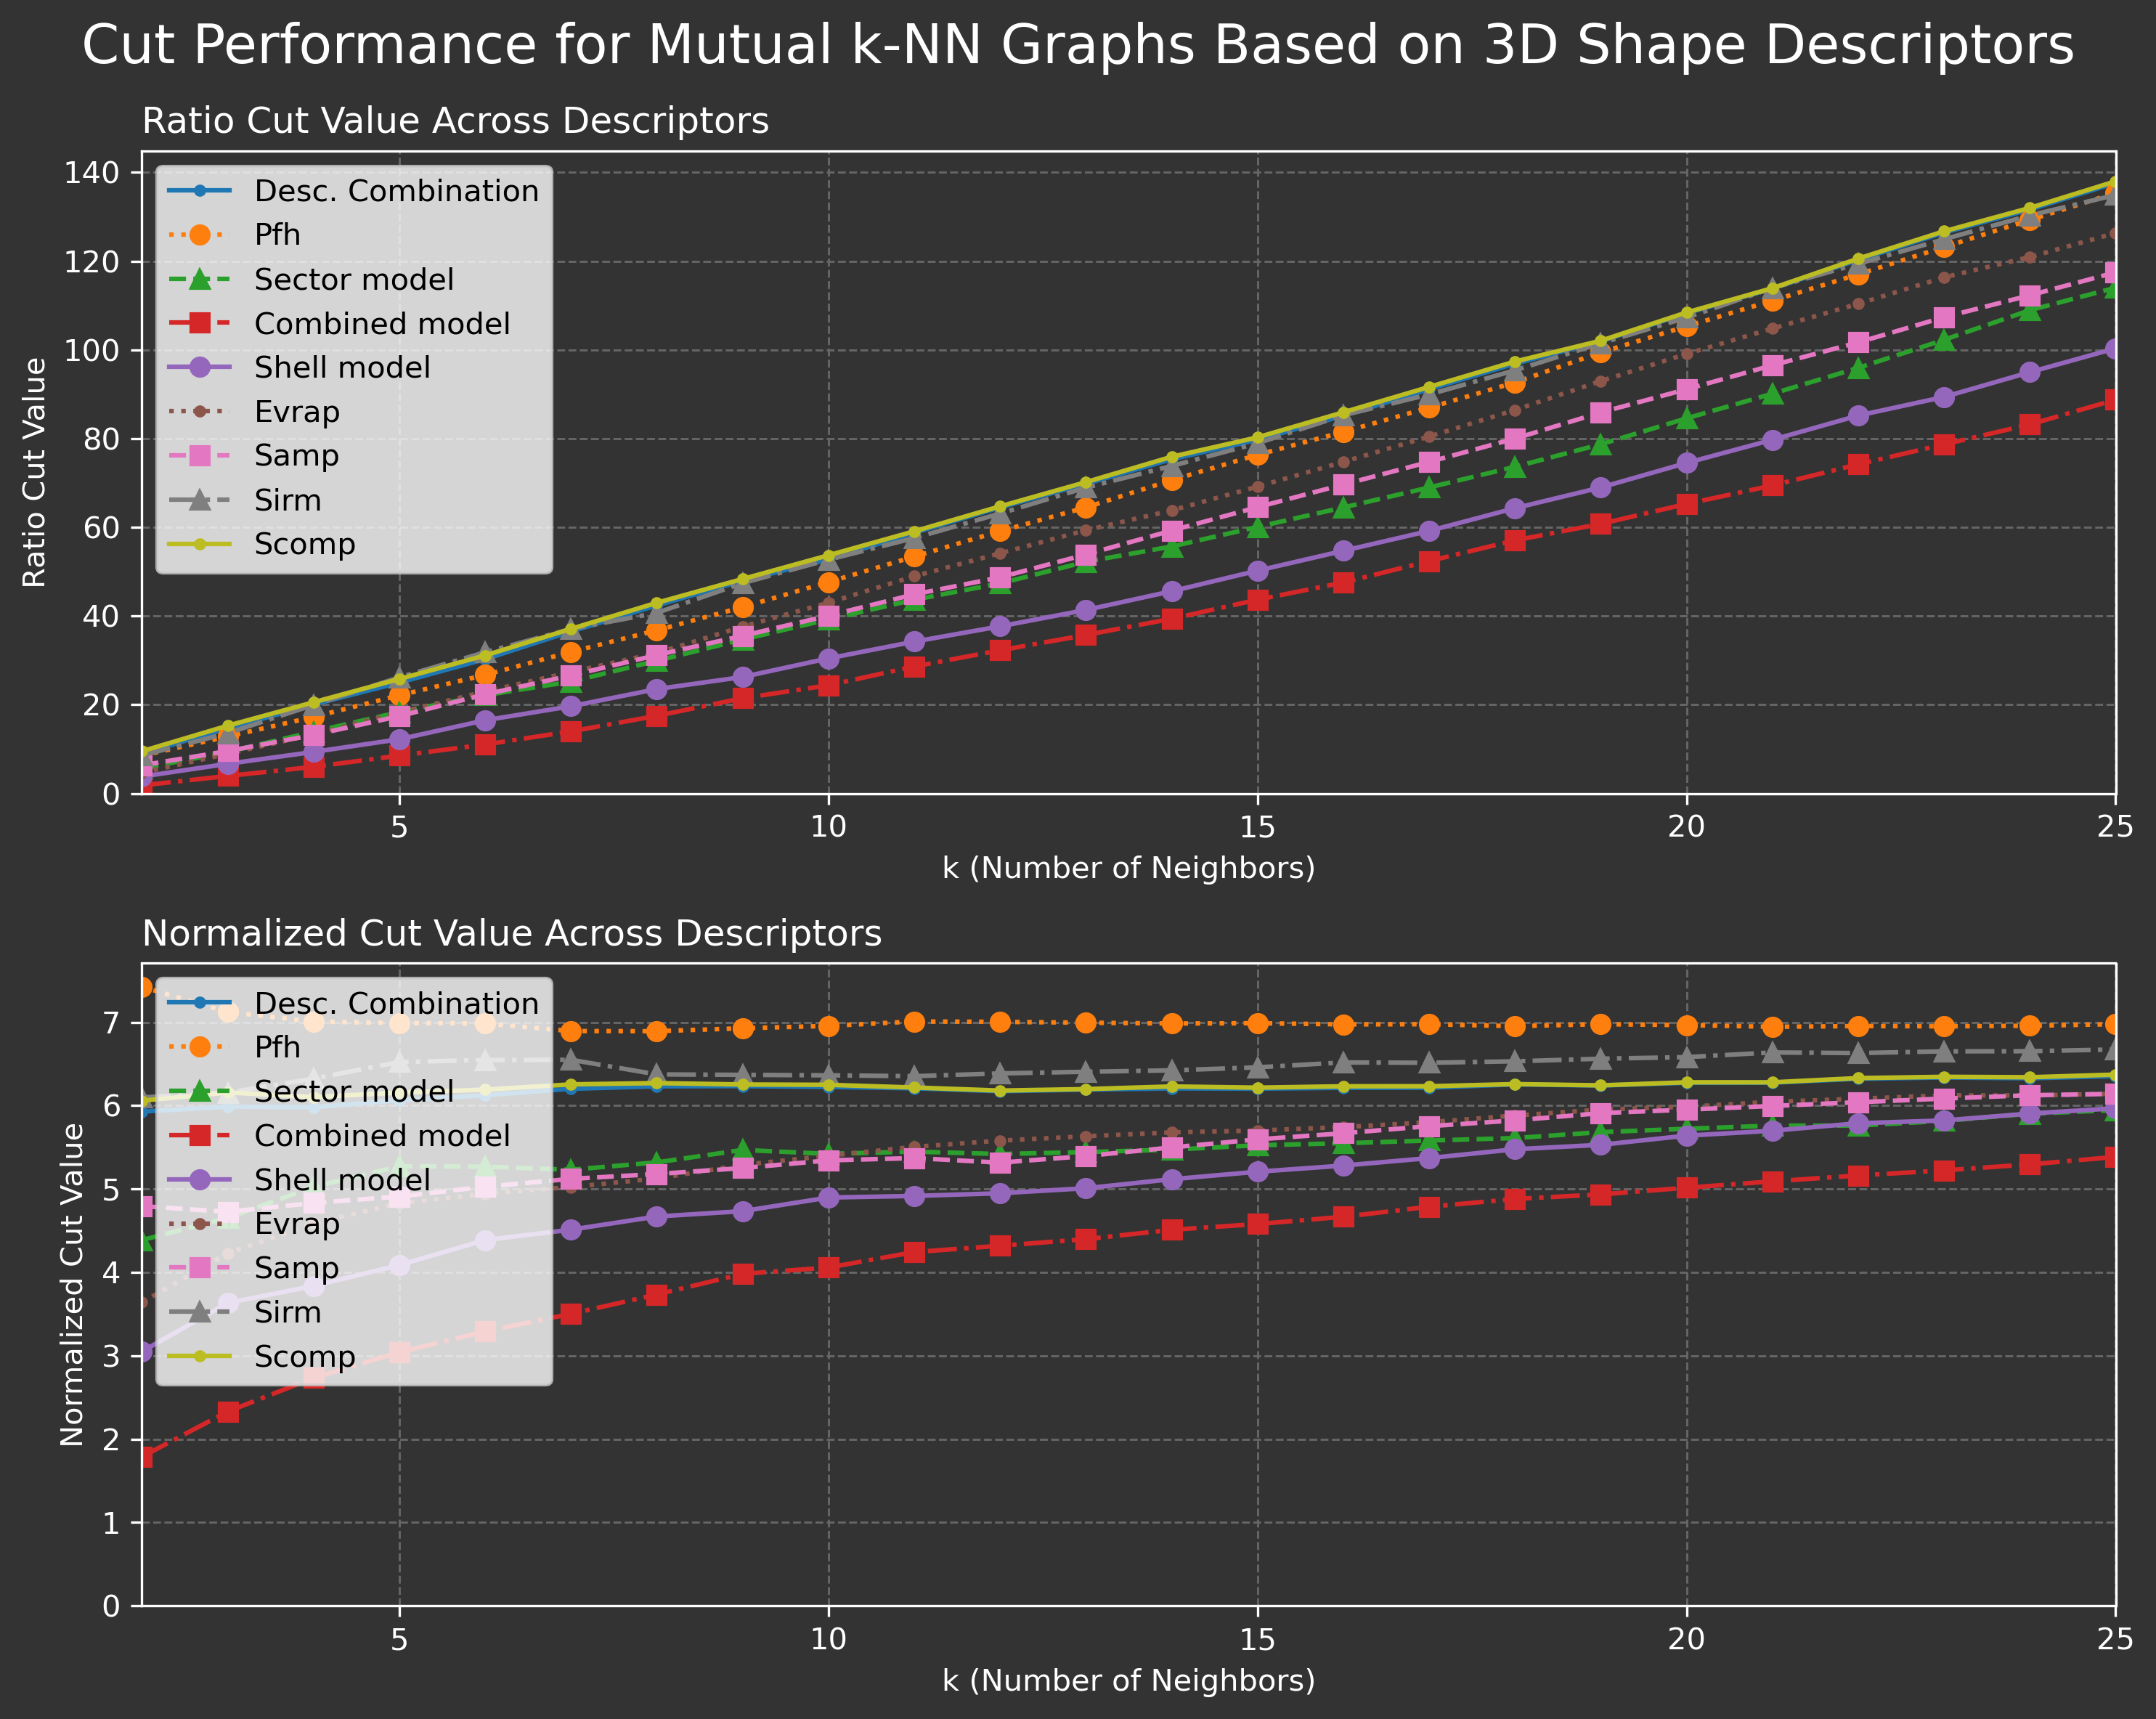

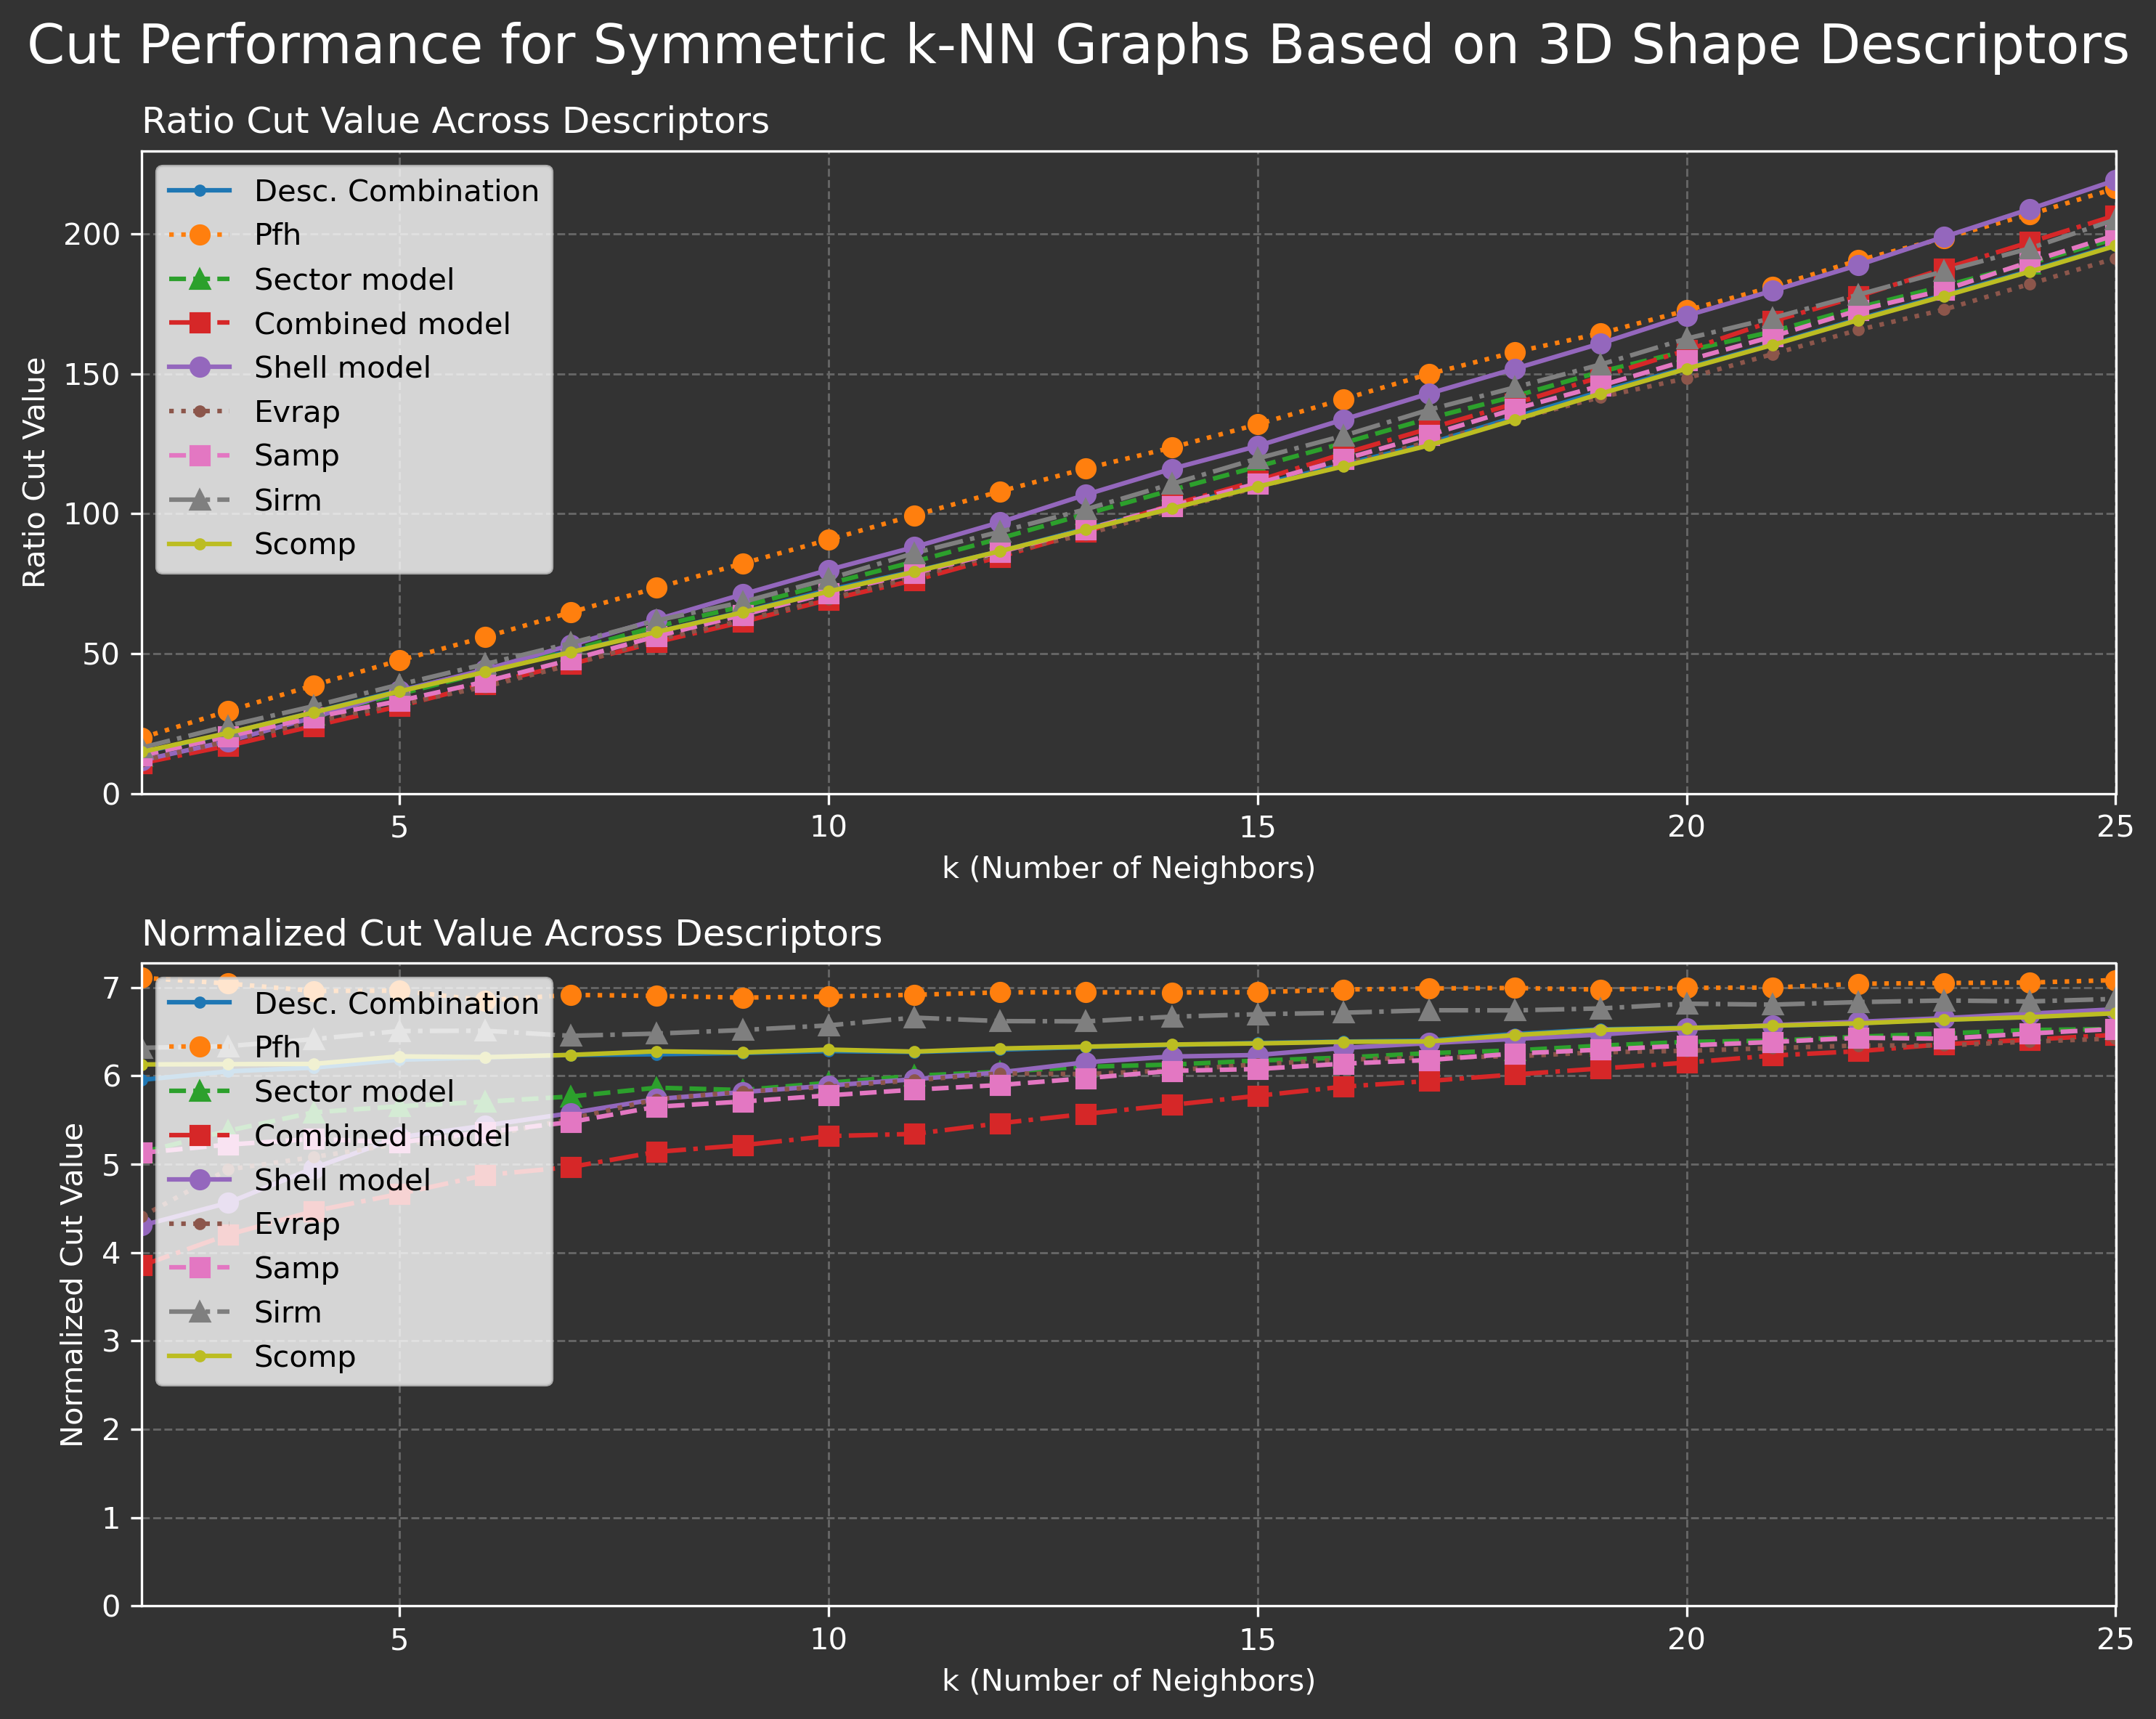

In [12]:
for knn_type in knn_types: 
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)  # Example with a 2x2 grid of subplots

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors')
    
    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors')
    
    fig.suptitle(f"Cut Performance for {knn_type.capitalize()} k-NN Graphs Based on 3D Shape Descriptors", color="white", fontsize=18)
    
    # Set figure background and adjust layout
    fig.patch.set_facecolor('#333333')  # Dark grey background for the figure
    fig.tight_layout()  # Ensure subplots fit within the figure
    
    plt.savefig(f"{knn_type}_ratio_normalized_cut_per_k.png", dpi=300)
    plt.show()

# Reduced d Performance

In [3]:
MAX_DIM = 20  # the maximum dimensionality is 36, a property of the combined model
descriptors = [['evrap', 'samp', 'sirm', 'scomp'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model']]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
d_values = range(1, MAX_DIM)
knn_types = ['mutual', 'symmetric']

In [4]:
plot_data = {
    knn_type: {
        metric: { '_'.join(descriptor): [] for descriptor in descriptors }
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}
for dim in d_values:
    for knn_variant in ['symmetric', 'mutual']:
        for descriptor in descriptors:
            knn_graph_data = compute_knn(df, descriptor_list=descriptor, n_neighbors=15, variant=knn_variant,
                                         pca=True, pca_dim=dim)
            n_clusters = len(np.unique(labels))

            ratio_cut = compute_ratio_cut(knn_graph_data, labels)
            normalized_cut = compute_normalized_cut(knn_graph_data, labels)

            plot_data[knn_variant]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
            plot_data[knn_variant]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

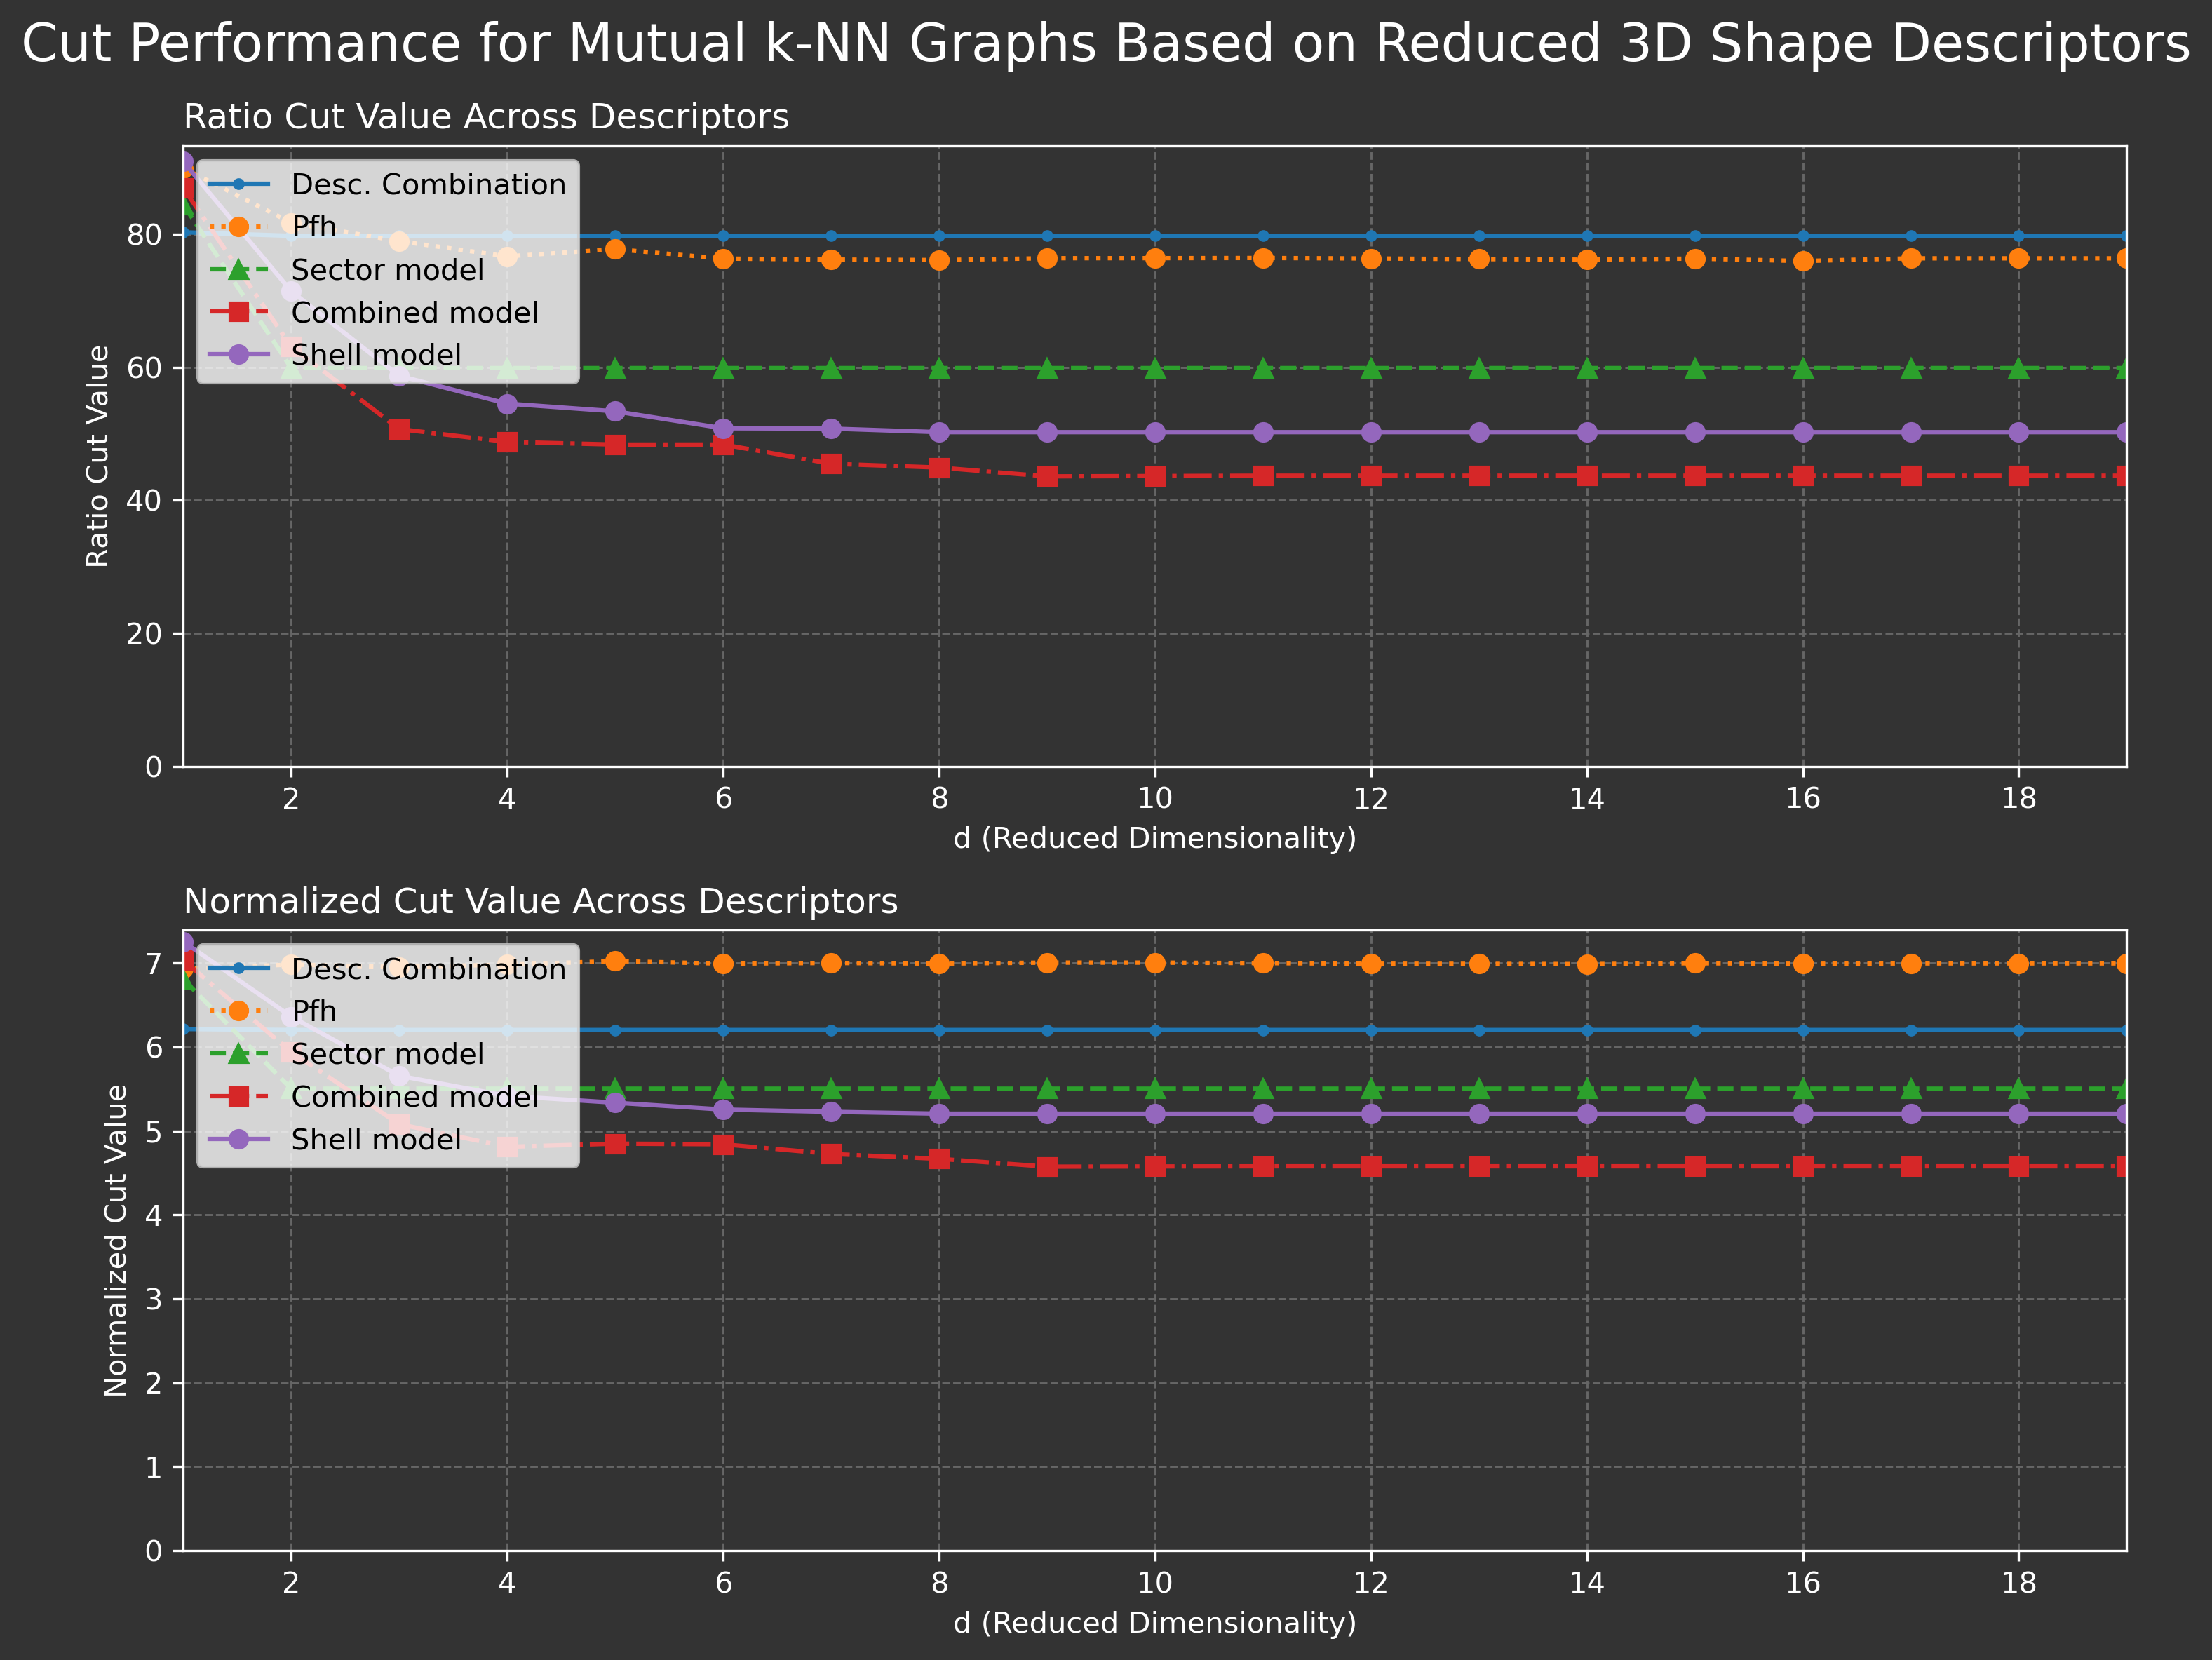

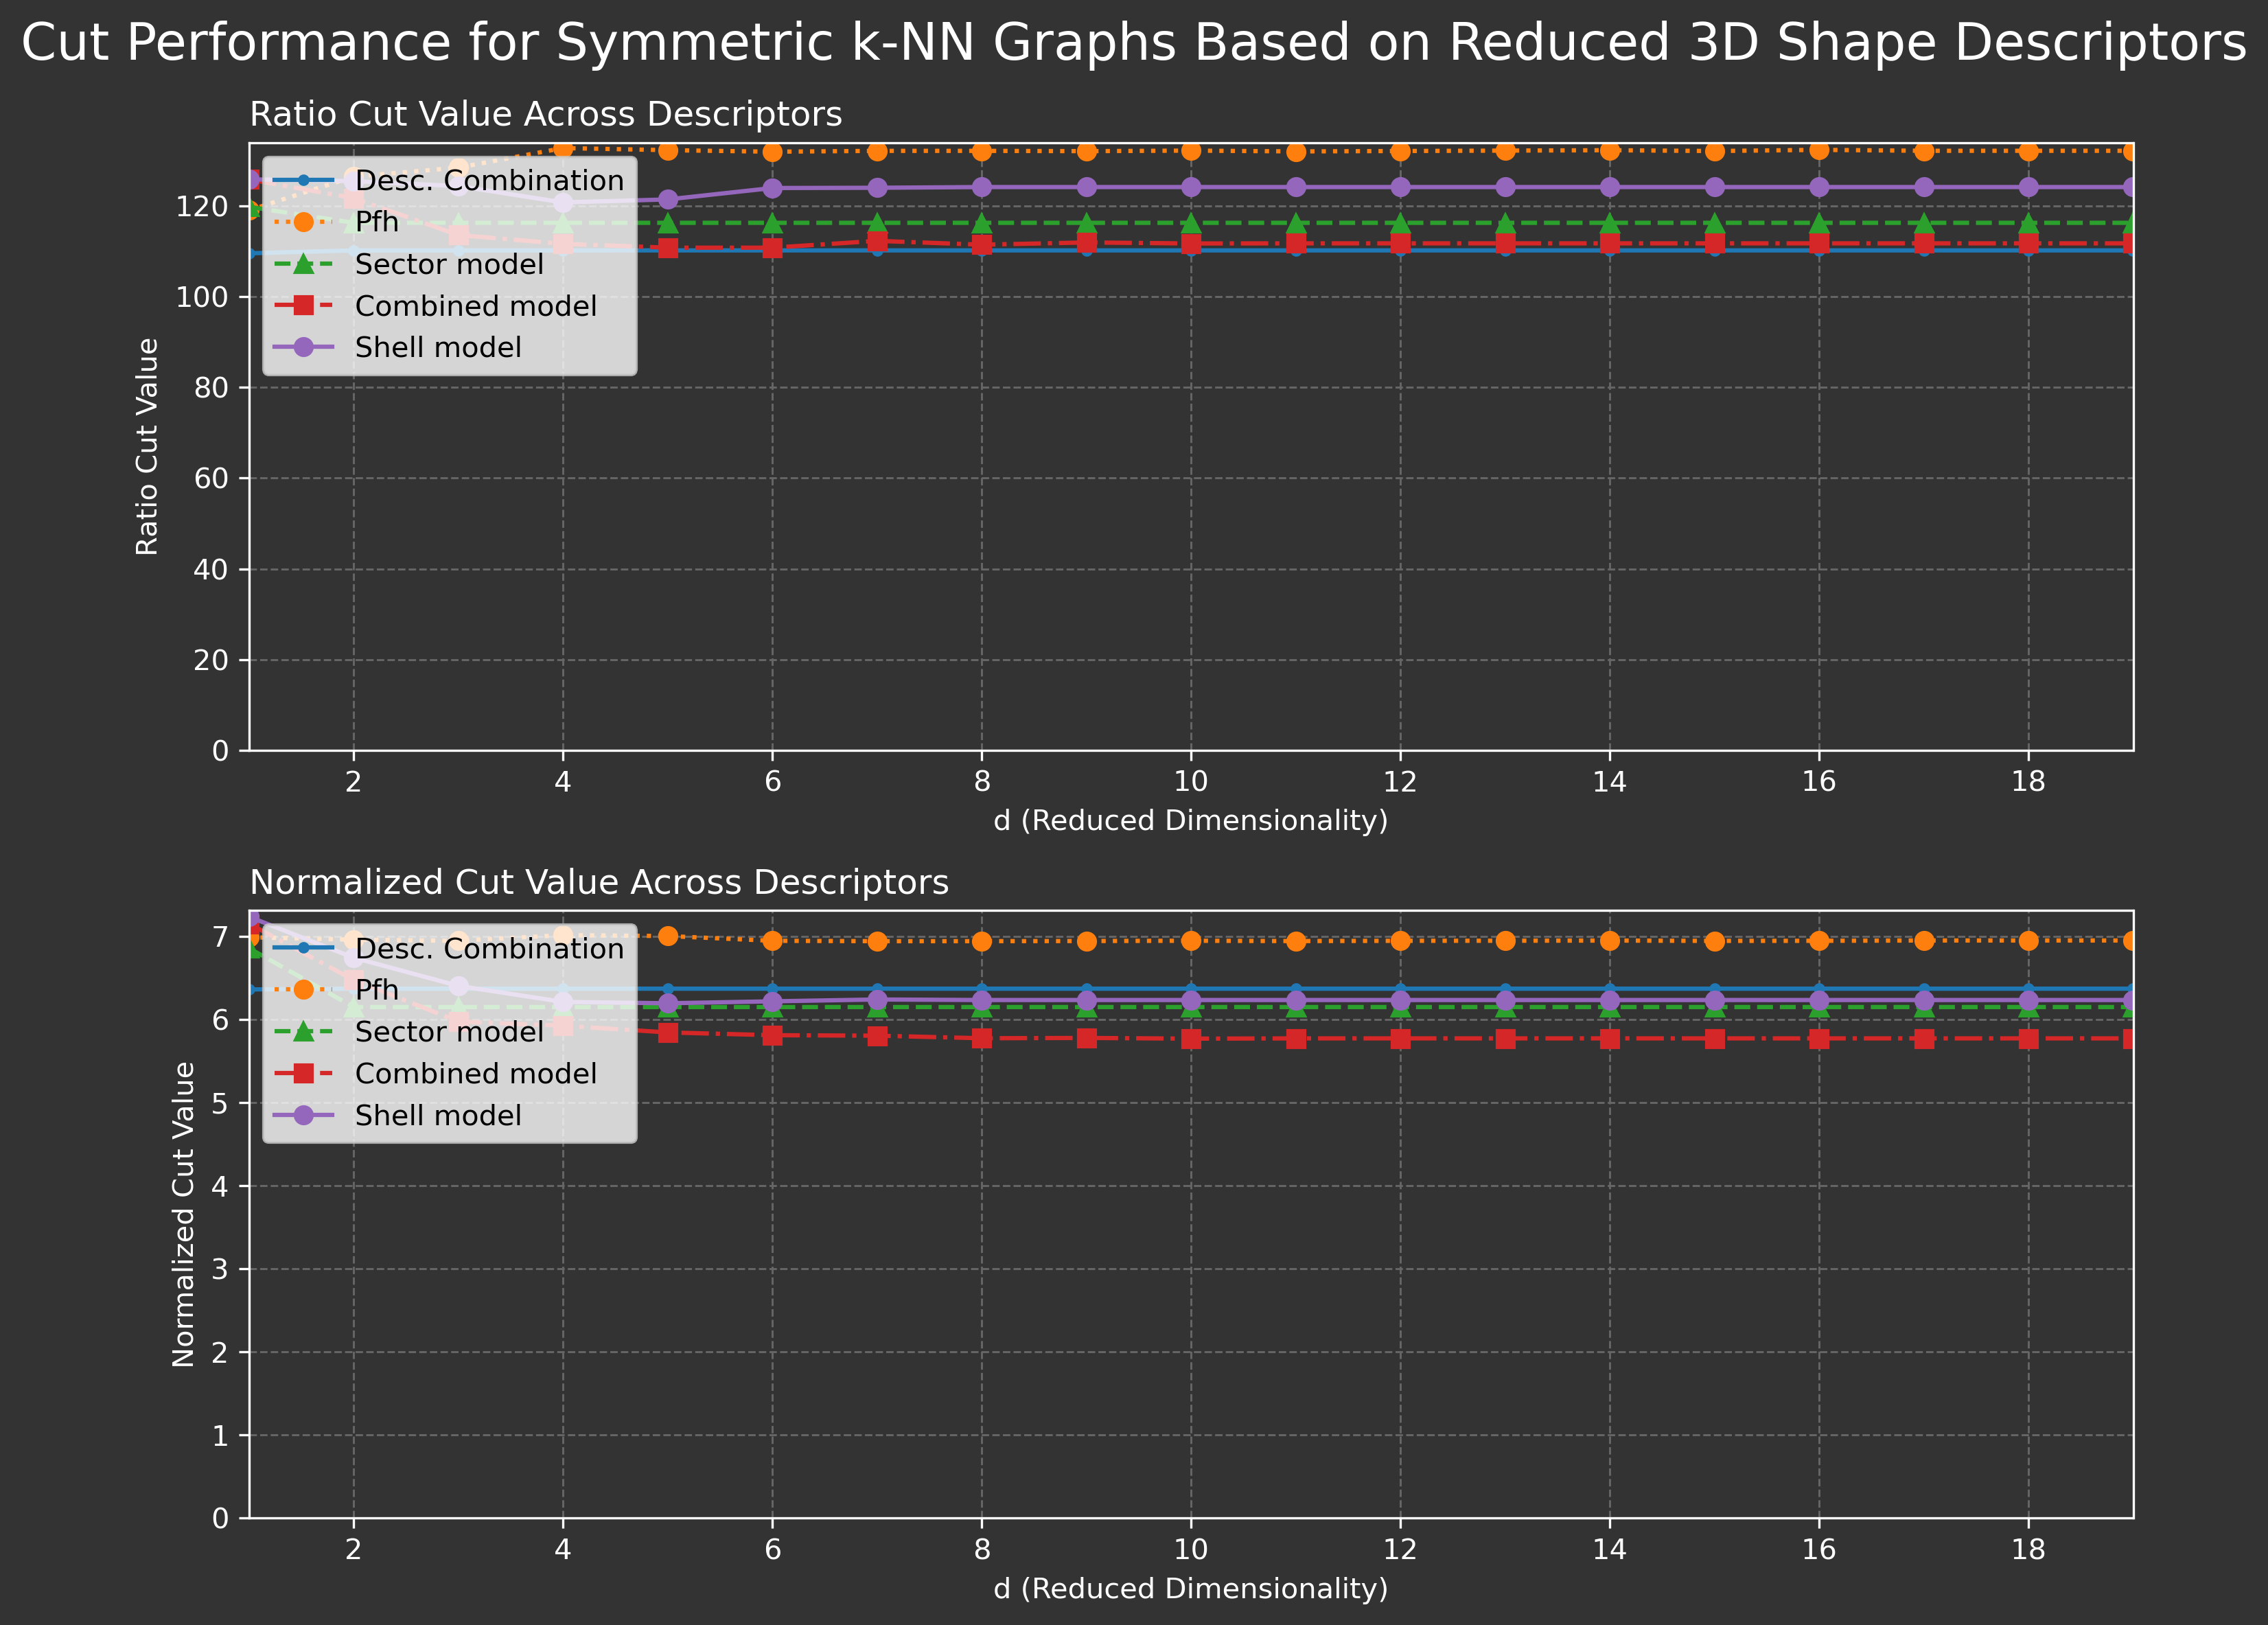

In [5]:
for knn_type in knn_types:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors', colors=colors)

    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors', colors=colors)

    fig.suptitle(f"Cut Performance for {knn_type.capitalize()} k-NN Graphs Based on Reduced 3D Shape Descriptors", color="white", fontsize=18)

    # Set figure background and adjust layout
    fig.patch.set_facecolor('#333333')  # Dark grey background for the figure
    fig.tight_layout()  # Ensure subplots fit within the figure

    plt.savefig(f"{knn_type}_ratio_normalized_cut_reduced_d.png", dpi=300)
    plt.show()